## Handling Missing Values using Complete Case Analysis (CCA)

CCA is a process where row are removed when values of a column are missing completely on random, i.e., there is no particular reason for why thiese values are missing. The null values can be anywhere in that particular column (not in any order).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Datasets/data_science_job.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
# percentage of null values in each row
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

From the above analysis we can observe 'gender' column has almost quarter of data missing. While columns 'compay_size' and 'company_type' has around 30% data missing. <br>
In CCA we need to consider only columns with 5% or less missing values to perfomr CCA.

In [8]:
# checking how many rows are there in df
df.shape

(19158, 13)

There are 19158 rows in the dataframe

#### Extracting only those columns which have less than 5% values missing 

In [12]:
cols = [col for col in df.columns if df[col].isnull().mean() > 0 and df[col].isnull().mean() < 0.05]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [23]:
df[cols].isnull().sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14324,False,False,True,False,False
17538,False,False,False,False,False
4057,False,False,False,False,False
1623,False,False,False,False,False
13116,True,False,False,False,False


In [26]:
# percentage of the data we are left with after removing rows with <5% missing values
(len(df[cols].dropna())/len(df))*100

89.68577095730244

In [28]:
# percentage of data left after removing rows with all missing values
(len(df.dropna())/len(df))*100

44.02338448689843

It can be seen there is a huge difference in the data we are left with when we remove all rows with all missing values and only few rows whose columns have less than 5% missing values.

In [31]:
# creating new dataframe after dropping missing values from df[cols]
df2 = df[cols].dropna()

In [32]:
# comparing new and old df
print('Old DF rows',df.shape)
print('New DF rows', df2.shape)

Old DF rows (19158, 13)
New DF rows (17182, 5)


### Checking distribution of numerical data after performing CCA
Now that we have applied CCA on our data there is one more thing to do. We need to confirm if the data was missing at random (MCAR). For this purpose I have plotted histogram and density plots to check if the distribution has remained same or not. If the distribution changes then the CCA process failed and data was actually not missing at random.

<AxesSubplot:>

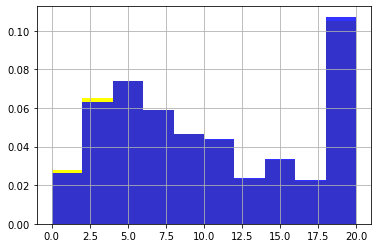

In [51]:
# comparing change in distribution
fig = plt.figure()
ax = fig.add_subplot(111)

# original df
df['experience'].hist(bins=10, ax=ax, density=True, color='yellow')

# new df
df2['experience'].hist(bins=10, ax=ax, density=True, color='blue', alpha=0.8)

<AxesSubplot:ylabel='Density'>

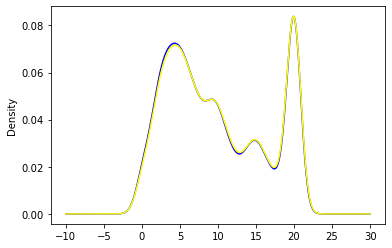

In [54]:
# PDF

df['experience'].plot.density(color='blue')
df2['experience'].plot.density(color='yellow')

From above plots can say data is missing at random

### Checking distribution of categorical data after performing CCA

Till now we only checked variation in numerical data, before and after CCA. We need to check what kind of changes happened to out categorical values. One way is to check the ratio of the categorical values. If the ratio is same after CCA then data was missing at random.

In [59]:
# unique values of the column
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [55]:
# checking the ratio of one column
tempdf = pd.concat([
    # percentage of the categorical values of 'enrolled_university' in old df
    df['enrolled_university'].value_counts()/len(df),
    
    # percentage of the categorical values of 'enrolled_university' in new df
    df2['enrolled_university'].value_counts()/len(df2)],
    axis=1)

tempdf.columns=['original', 'cca']
tempdf

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


From above analysis we can observe there is not huge difference in the ratios before and after performing CCA

In [60]:
# repeating same for another column
tempdf = pd.concat([
    # percentage of the categorical values of 'enrolled_university' in old df
    df['education_level'].value_counts()/len(df),
    
    # percentage of the categorical values of 'enrolled_university' in new df
    df2['education_level'].value_counts()/len(df2)],
    axis=1)

tempdf.columns=['original', 'cca']
tempdf

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


'education_level' distribution hasn't changed drastically and choosing CCA was not a bad choice!

## Summary

We have seen how to perform Complete Case Analysis. It should be noted that CCA is not usually a preferred choice while handling missing values. As you can see we have no where came up with a process to handle future null values. All we did is helpful for historical data only. If this model is pushed on the server where new data is entered this model is going to fail.